# Text Classification Exercises

## Exercise 1: Dataset Exploration

**Objective**: Familiarize yourself with the dataset.

1. Load the **News Category Dataset** (News_Category_Dataset_v3.json), which contains approximately 210,000 news headlines from 2012 to 2022. **Hint: read the file with Python, parse it with the json library and convert it to a pandas DataFrame.** **Note: you need to extract the file from the zip archive before loading it.**
2. Identify the target label.
3. Which features do you find relevant for the classification task?
4. Perform exploratory data analysis (EDA):
   - Check for any missing values.
   - Visualize the distribution of categories.


In [14]:
import json

import numpy as np
import pandas as pd

with open("../../data/News_Category_Dataset_v3.json", 'r') as f:
    data = f.read()

json_data = [json.loads(line) for line in data.split('\n') if line]
df = pd.DataFrame(json_data)

df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [15]:
df = df[['headline', 'category', 'short_description']]
df.head()

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha..."
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...


In [16]:
df['category'].value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

In [17]:
top10 = df['category'].value_counts().nlargest(10)

top10

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
Name: count, dtype: int64

In [18]:
top10 = top10.index

df_i = df[df['category'].isin(top10)]
df_i

,headline,category,short_description
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
20,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv..."
21,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.
24,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...
28,James Cameron Says He 'Clashed' With Studio Be...,ENTERTAINMENT,"The ""Avatar"" director said aspects of his 2009..."
...,...,...,...
209509,Walmart Waving Goodbye To Some Greeters,BUSINESS,"After 30 years, ""People Greeters"" will no long..."
209510,"At World Economic Forum, Fear of Global Contag...",BUSINESS,"For decades, as crises have assailed developin..."
209511,Positive Customer Experience: What's the Retur...,BUSINESS,"""Analysts at Adobe combined historical purchas..."
209512,"Sundance, Ice-T, and Shades of the American Ra...",ENTERTAINMENT,Representation of the collective diaspora has ...


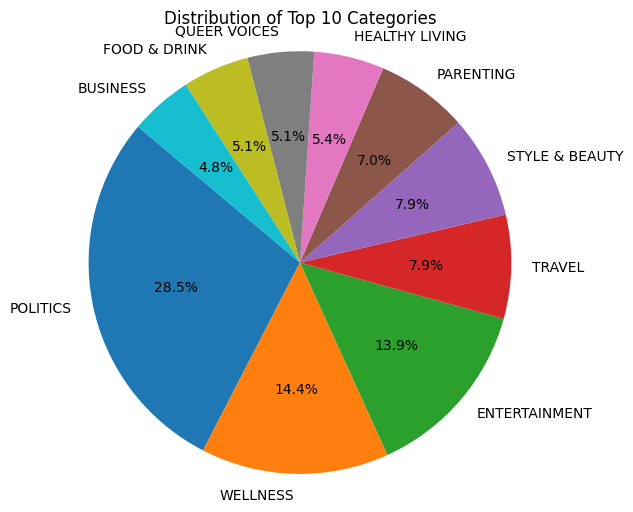

In [19]:
import matplotlib.pyplot as plt
category_counts = df_i['category'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 10 Categories')
plt.axis('equal')
plt.show()

## Exercise 2: Text Preprocessing

**Objective**: Prepare the text data for classification tasks.

1. Preprocess the "headline" and "short_description" fields by performing the following steps:
   - Convert all text to lowercase.
   - Remove punctuation, digits, and any other irrelevant characters.
   - Remove stop words.
   - Apply either stemming or lemmatization.
2. Observe how the data changes at each step of preprocessing.
3. Create a new column that concatenates the processed "headline" and "short_description" fields.

In [66]:
import re
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem import SnowballStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def process_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r"\d", "", text)
    punct = string.punctuation
    text = text.replace(punct, "")
    text = re.sub(r"\W", " ", text)
    return " ".join(text.split())

def eliminate_stop_words(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)
    
def apply_stemming(text):
    stemer = SnowballStemmer(language='english')
    words = text.split()
    words = [stemer.stem(word) for word in words]
    return ' '.join(words)

def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

def process_and_clean(text):
    text = process_text(text)
    text = eliminate_stop_words(text)
    text = apply_stemming(text)
    return text
    

[nltk_data] Downloading package stopwords to /home/lcda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lcda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
print(df_i.iloc[0]['headline'])

The Funniest Tweets From Parents This Week (Sept. 17-23)


In [43]:
iter1 = process_text(df_i.iloc[0]['headline'])
iter1

'the funniest tweets from parents this week sept'

In [44]:
iter2 = eliminate_stop_words(iter1)
iter2

'funniest tweets parents week sept'

In [48]:
iter3 = apply_stemming(iter2)
iter3

'funniest tweet parent week sept'

In [61]:
iter4 = apply_lemmatization(iter2)
iter4

'funniest tweet parent week sept'

In [63]:
# merge headline and short_description in one column
df_i['text'] = df_i['headline'] + df_i['short_description']
df_i.head()

/tmp/ipykernel_7845/793805773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i['text'] = df_i['headline'] + df_i['short_description']


,headline,category,short_description,text
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",The Funniest Tweets From Parents This Week (Se...
20,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv...",Golden Globes Returning To NBC In January Afte...
21,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,Biden Says U.S. Forces Would Defend Taiwan If ...
24,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,‘Beautiful And Sad At The Same Time’: Ukrainia...
28,James Cameron Says He 'Clashed' With Studio Be...,ENTERTAINMENT,"The ""Avatar"" director said aspects of his 2009...",James Cameron Says He 'Clashed' With Studio Be...


In [67]:
df_i['preprocessed_text'] = df_i['text'].apply(process_and_clean)
df_i = df_i[['preprocessed_text', 'category']]
df_i.head()

/tmp/ipykernel_7845/740878646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i['preprocessed_text'] = df_i['text'].apply(process_and_clean)


,preprocessed_text,category
3,funniest tweet parent week sept accident put g...,PARENTING
20,golden globe return nbc januari year airfor pa...,ENTERTAINMENT
21,biden say u forc would defend taiwan china inv...,POLITICS
24,beauti sad time ukrainian cultur festiv take d...,POLITICS
28,jame cameron say clash studio avatar releaseth...,ENTERTAINMENT


## Exercise 3: Data Splitting

**Objective**: Split the dataset into training and testing sets.

1. Divide the data into **training** and **testing** sets.
   - Use an appropriate train-test split ratio (e.g., 80-20 or 70-30).
   - Ensure the split is **stratified** to maintain the distribution of categories.
   

In [68]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_i, test_size=0.2, random_state=42, stratify=df_i['category'])
train.shape, test.shape

((99829, 2), (24958, 2))

In [69]:
train.head()

,preprocessed_text,category
185942,sriracha ice cream sandwich glut life total in...,FOOD & DRINK
49565,friday talk point turkey leftoversso everyon f...,POLITICS
195665,elli krieger healthi snack learn love cookinge...,WELLNESS
27355,main gov paul lepag say take confeder statu li...,POLITICS
196189,teen sext need knowsend photo may seem like fu...,PARENTING


In [70]:
x_train = train['preprocessed_text']
y_train = train['category']
x_test = test['preprocessed_text']
y_test = test['category']

## Exercise 4: Feature Extraction

**Objective**: Convert the text data into numerical features.

1. Apply one of the following feature extraction techniques:
   - **Bag-of-Words (BoW)**
   - **TF-IDF**
   - Optionally, apply N-grams (unigrams, bigrams, etc.) before feature extraction.
2. Use either the **sklearn** or **nltk** packages for feature extraction.

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

vectorize = CountVectorizer(max_features=5000)

x_train_bow = vectorize.fit_transform(x_train)
x_test_bow = vectorize.transform(x_test)

x_train_bow.shape, x_test_bow.shape

((99829, 5000), (24958, 5000))

In [81]:
vectorize.get_feature_names_out()

array(['aaron', 'ab', 'abandon', ..., 'zombi', 'zone', 'zuckerberg'],
      dtype=object)

## Exercise 5: Clustering

**Objective**: Cluster news articles based on their content.

1. Apply KMeans clustering to group news articles into 10 clusters.
2. Visualize the clusters using PCA or t-SNE.

In [82]:
from sklearn.cluster import KMeans

k = 10
kmeans = KMeans(n_clusters=k, random_state=123).fit(x_train_bow)

In [84]:
kmeans.labels_[:10]

array([2, 6, 2, 6, 8, 8, 8, 8, 6, 8], dtype=int32)

In [85]:
y_train[:10]

185942      FOOD & DRINK
49565           POLITICS
195665          WELLNESS
27355           POLITICS
196189         PARENTING
108680    HEALTHY LIVING
180116      FOOD & DRINK
156600      FOOD & DRINK
42511           POLITICS
195446          WELLNESS
Name: category, dtype: object

In [87]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123).fit(x_train_bow)
X_reduced = pca.fit_transform(x_train_bow)
X_reduced

array([[-0.28980808, -0.08597367],
       [ 1.01729947,  0.04291636],
       [-0.33516416,  0.04587046],
       ...,
       [-0.24562217, -0.17228228],
       [ 0.75301915,  0.00656649],
       [-0.05018473, -0.14486838]])

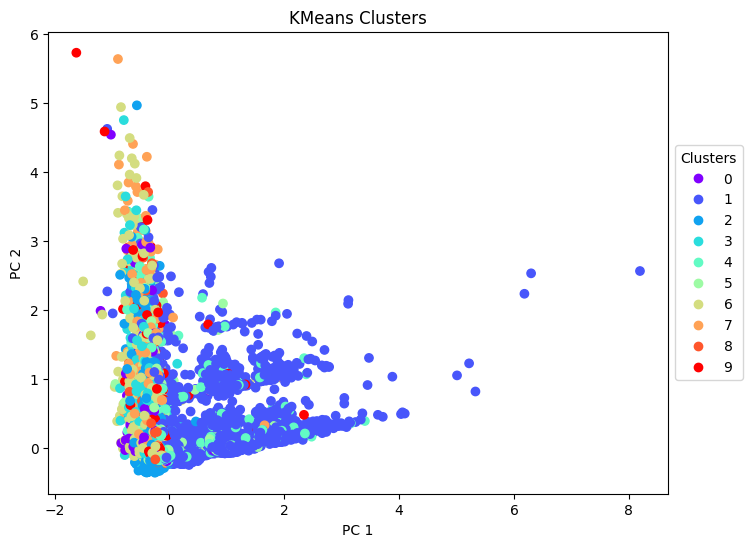

In [95]:
color_map = {cat: i for i, cat in enumerate(set(y_train))}
colors = y_train.map(color_map)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colors, cmap='rainbow', label=y_train)
plt.title('KMeans Clusters')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.legend(*scatter.legend_elements(), loc='center left', bbox_to_anchor=(1, 0.5), title='Clusters')
plt.show()

In [89]:
color_map

{'HEALTHY LIVING': 0,
 'POLITICS': 1,
 'STYLE & BEAUTY': 2,
 'PARENTING': 3,
 'ENTERTAINMENT': 4,
 'QUEER VOICES': 5,
 'WELLNESS': 6,
 'TRAVEL': 7,
 'FOOD & DRINK': 8,
 'BUSINESS': 9}

In [90]:
y_train

185942     FOOD & DRINK
49565          POLITICS
195665         WELLNESS
27355          POLITICS
196189        PARENTING
              ...      
31091          POLITICS
66017     ENTERTAINMENT
208543     FOOD & DRINK
17268          POLITICS
48353          POLITICS
Name: category, Length: 99829, dtype: object

## Exercise 6: Model Training

**Objective**: Train machine learning models for text classification.

1. Train various machine learning models on the preprocessed and vectorized data.
   - Choose models from the **sklearn** library (e.g., Logistic Regression, Random Forest, SVM).
   

In [96]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=123).fit(x_train_bow, y_train)

/home/lcda/miniconda3/envs/tac-hands-on/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=123).fit(x_train_bow, y_train)

## Exercise 7: Model Evaluation

**Objective**: Evaluate the performance of the trained models.

1. Evaluate the models using appropriate metrics such as accuracy, precision, recall, and F1-score.
2. Perform **cross-validation** on at least one model to ensure reliable performance evaluation.


In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_lr = model.predict(x_test_bow)
acc = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')

acc, precision, recall, f1

(0.7671287763442584,
 np.float64(0.7627128526028978),
 np.float64(0.7671287763442584),
 np.float64(0.7639566567028816))

In [104]:
from sklearn.metrics import classification_report
import pprint

pprint.pp(classification_report(y_test, y_pred_lr, target_names=set(set(y_train))))

('                precision    recall  f1-score   support\n'
 '\n'
 'HEALTHY LIVING       0.61      0.53      0.56      1198\n'
 '      POLITICS       0.77      0.81      0.79      3473\n'
 'STYLE & BEAUTY       0.78      0.74      0.76      1268\n'
 '     PARENTING       0.42      0.35      0.38      1339\n'
 ' ENTERTAINMENT       0.73      0.67      0.70      1758\n'
 '  QUEER VOICES       0.86      0.90      0.88      7121\n'
 '      WELLNESS       0.79      0.69      0.74      1269\n'
 '        TRAVEL       0.85      0.84      0.85      1963\n'
 '  FOOD & DRINK       0.79      0.77      0.78      1980\n'
 '      BUSINESS       0.68      0.74      0.71      3589\n'
 '\n'
 '      accuracy                           0.77     24958\n'
 '     macro avg       0.73      0.70      0.71     24958\n'
 '  weighted avg       0.76      0.77      0.76     24958\n')


In [105]:
y_pred_lr = rf.predict(x_test_bow)
acc = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')

acc, precision, recall, f1

(0.7246173571600288,
 np.float64(0.7194341377738263),
 np.float64(0.7246173571600288),
 np.float64(0.7177049117729434))

In [106]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(model, x_train_bow, y_train, cv=3))

/home/lcda/miniconda3/envs/tac-hands-on/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lcda/miniconda3/envs/tac-hands-on/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

[0.75761036 0.75655127 0.75567977]


/home/lcda/miniconda3/envs/tac-hands-on/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model, x_train_bow, y_train, cv=3)
y_pred

/home/lcda/miniconda3/envs/tac-hands-on/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lcda/miniconda3/envs/tac-hands-on/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

array(['FOOD & DRINK', 'POLITICS', 'HEALTHY LIVING', ..., 'FOOD & DRINK',
       'POLITICS', 'POLITICS'], dtype=object)

In [109]:
len(y_pred)

99829

In [110]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=123)
params = {'max_depth': [1, 2, 3],
          'n_estimators': [100, 200],}

gs = GridSearchCV(model, params, cv=3)
gs.fit(x_train_bow, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [1, 2, 3], 'n_estimators': [100, 200]})

In [111]:
gs.cv_results_

{'mean_fit_time': array([0.41446098, 0.71715879, 0.42199524, 0.7707773 , 0.44611176,
        0.82662892]),
 'std_fit_time': array([0.01708373, 0.02999938, 0.01260252, 0.02800989, 0.01484968,
        0.02939055]),
 'mean_score_time': array([0.12853416, 0.20716453, 0.11685069, 0.21443089, 0.11911869,
        0.20820268]),
 'std_score_time': array([0.01842562, 0.00986269, 0.00030928, 0.01497384, 0.00031958,
        0.00047139]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'param_n_estimators': masked_array(data=[100, 200, 100, 200, 100, 200],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'params': [{'max_depth': 1, 'n_estimators': 100},
  {'max_depth': 1, 'n_estimators': 200},
  {'max_depth': 2, 'n_estimators': 100},
  {'max_depth': 2, 'n_estimators': 200},
  {'max_depth': 3, 'n_estimators': 100},
  {'max_depth': 3, 'n_estimators': 200}],


In [112]:
gs.best_params_

{'max_depth': 3, 'n_estimators': 200}

In [113]:
gs.best_score_

np.float64(0.290176200459387)

In [ ]:
model = RandomForestClassifier(**gs.best_params_).fit(x_train_bow, y_train)